In [7]:
import pandas as pd
#Reading dataset
Email_dataset = pd.read_csv("spam_ham_dataset.csv")
#Show dataset
Email_dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
#Import all libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
import string
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
warnings.filterwarnings('ignore')

In [9]:
#creating word cloud for given corpus
def make_wordcloud(corpus , stopword):
    word_cloud = WordCloud(
            width=3000,
            height=2000,
            random_state=1,
            background_color="black",
            colormap="Pastel1",
            collocations=False,
            stopwords=stopword,
            ).generate(corpus)
    return word_cloud

In [10]:
#This function swaps 2 columns inside the dataframe
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [11]:
#This function removes punctuation from string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [12]:
s=Email_dataset["label"].value_counts()
s

label
ham     3672
spam    1499
Name: count, dtype: int64

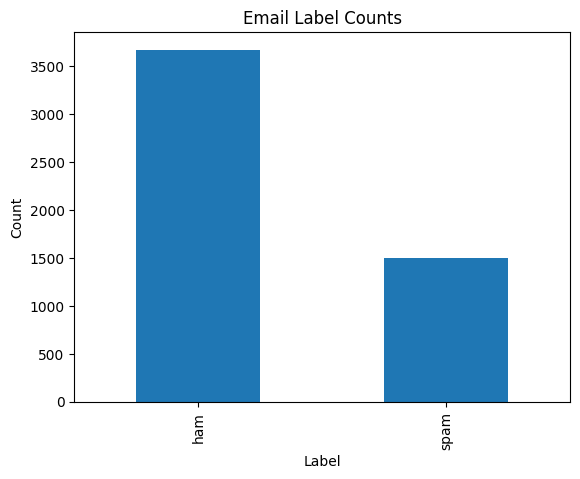

In [13]:
# create a bar chart
s.plot.bar()

# set the title and axis labels
plt.title("Email Label Counts")
plt.xlabel("Label")
plt.ylabel("Count")

# display the chart
plt.show()

In [14]:
#Dropping columns that are not needed
Email_dataset = Email_dataset.drop('Unnamed: 0', axis=1)
Email_dataset = Email_dataset.drop('label', axis=1)

In [15]:
Email_dataset.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [16]:
#Creating a new feature, extracting subject of each email
subjects = []
for i in range(len(Email_dataset)):
    ln = Email_dataset["text"][i]
    line = ""
    for i in ln:
        if(i == '\r'):
            break
        line = line + i
    line = line.replace("Subject" , "")
    subjects.append(line)

In [17]:
Email_dataset['Subject'] = subjects

In [18]:
#Renaming the dataframe columns
Email_dataset.columns = ["Email_text" , "Labels" , "Email_Subject"]

In [19]:
Email_dataset.head()

,Email_text,Labels,Email_Subject
0,Subject: enron methanol ; meter # : 988291\r\n...,0,: enron methanol ; meter # : 988291
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,": hpl nom for january 9 , 2001"
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,: neon retreat
3,"Subject: photoshop , windows , office . cheap ...",1,": photoshop , windows , office . cheap . main ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,: re : indian springs


In [20]:
#Swapping the dataframe columns
Email_dataset = swap_columns(Email_dataset, 'Labels', 'Email_Subject')

In [21]:
Email_dataset.head()

,Email_text,Email_Subject,Labels
0,Subject: enron methanol ; meter # : 988291\r\n...,: enron methanol ; meter # : 988291,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",": hpl nom for january 9 , 2001",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",: neon retreat,0
3,"Subject: photoshop , windows , office . cheap ...",": photoshop , windows , office . cheap . main ...",1
4,Subject: re : indian springs\r\nthis deal is t...,: re : indian springs,0


In [22]:
#Converting all strings to lowercase
Email_dataset['Email_Subject'] = Email_dataset['Email_Subject'].str.lower()
Email_dataset['Email_text'] = Email_dataset['Email_text'].str.lower()

In [23]:
#Removing Punctuation from the data
Email_dataset['Email_Subject'] = Email_dataset['Email_Subject'].apply(remove_punctuations)
Email_dataset['Email_text'] = Email_dataset['Email_text'].apply(remove_punctuations)

In [24]:
Email_dataset.head()

,Email_text,Email_Subject,Labels
0,subject enron methanol meter 988291\r\nthis...,enron methanol meter 988291,0
1,subject hpl nom for january 9 2001\r\n see at...,hpl nom for january 9 2001,0
2,subject neon retreat\r\nho ho ho we re aroun...,neon retreat,0
3,subject photoshop windows office cheap mai...,photoshop windows office cheap main trending,1
4,subject re indian springs\r\nthis deal is to ...,re indian springs,0


In [25]:
#create a corpus conatininga all the email text
Email_text_corpus = []
for line in Email_dataset['Email_text']:
    words = line.split(" ")
    Email_text_corpus.append(words)

In [26]:
#create a word2vec model for words in email text
model = Word2Vec(Email_text_corpus, min_count=1, vector_size=56)

In [27]:
X = model.wv[model.wv.key_to_index ]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pca_df = pd.DataFrame(result, columns = ['x','y'])


In [28]:
Email_dataset.head()

,Email_text,Email_Subject,Labels
0,subject enron methanol meter 988291\r\nthis...,enron methanol meter 988291,0
1,subject hpl nom for january 9 2001\r\n see at...,hpl nom for january 9 2001,0
2,subject neon retreat\r\nho ho ho we re aroun...,neon retreat,0
3,subject photoshop windows office cheap mai...,photoshop windows office cheap main trending,1
4,subject re indian springs\r\nthis deal is to ...,re indian springs,0


In [29]:
#split email dataset
X_train, X_test , y_train, y_test = train_test_split(Email_dataset['Email_text'], Email_dataset['Labels'] , test_size=0.2, random_state=0)

In [30]:
#vectorize our training dataset
Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)

In [31]:
#fit the dataset on multinomial naive bayes
Spam_detection = MultinomialNB()
targets = y_train.values
Spam_detection.fit(count, targets)

MultinomialNB()

In [32]:
#make predictions
y_predict = Spam_detection.predict(Vectorizer.transform(X_test))

In [33]:
#test accuracy
accuracy_score(y_test, y_predict)

0.9729468599033816

Text(50.722222222222214, 0.5, 'Actual')

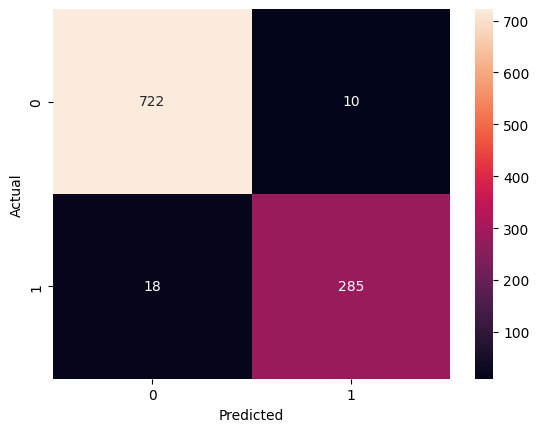

In [34]:
#create a confusion matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [35]:
#print the classification report
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       732
           1       0.97      0.94      0.95       303

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035

